In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler  , PolynomialFeatures

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error , r2_score , f1_score , precision_score , accuracy_score , mean_squared_error
            
from datetime import date

ModuleNotFoundError: No module named 'xgboost'

In [ ]:

data = pd.read_csv(r'D:\Desktop\Project Task 1\dataset_file.csv' , sep=',')
print(data.head())

         Date Time of Day      Category   Platform Service Type Customer Type  \
0  2024-10-29       Night  Subscription  Instagram      Haircut     Returning   
1  2024-09-25       Night       Service      Email        Bread     Returning   
2  2024-10-05       Night       Service   In-store       Coffee           New   
3  2024-07-15     Morning  Subscription  Instagram     Plumbing     Returning   
4  2024-12-25     Morning       Service   In-store      Haircut     Returning   

   Ad Spend  Conversions  Daily Revenue  
0     94.34            5         366.74  
1     56.36            4         492.62  
2     92.64            0         330.15  
3     90.13            3          99.41  
4     73.70            2         203.81  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2000 non-null   object 
 1   Time of Day    2000 non-null   object 
 2   Category       2000 non-null   object 
 3   Platform       2000 non-null   object 
 4   Service Type   2000 non-null   object 
 5   Customer Type  2000 non-null   object 
 6   Ad Spend       2000 non-null   float64
 7   Conversions    2000 non-null   int64  
 8   Daily Revenue  2000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 140.8+ KB


In [ ]:
print(data.columns)

Index(['Date', 'Time of Day', 'Category', 'Platform', 'Service Type',
       'Customer Type', 'Ad Spend', 'Conversions', 'Daily Revenue'],
      dtype='object')


In [ ]:
def Date_Calculation(date_sent : date) : # used in  main.py file  # used to compute the date from certain date dedicated by user untill this day
  years = (date.today().year - date_sent.year)
  months = (date.today().month - date_sent.month)
  days = (date.today().day - date_sent.day)
  years = years if years > 0 else 0
  remainder = 0
  if months >= 0 :
        months =  months
        remainder = months / 12
  else :
        years -=1
        months = date.today().month
        remainder = months / 12

  return round((years + remainder) , 2) # used to calcualte the number of years like 4.53 years


In [ ]:

# convert  the date values to period as we will compute the period that  the last coefficiently
# as this helps us to detect which causes the clients to reduce treating with the company
# which helps us to make strategies to increase the number of clients , and increase the 
# duration of their treatment with the company as this increases the revenues

data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by=['Date'] )
data['Last_treatment_Period_In_Years'] = data['Date'].apply(Date_Calculation)
 
data["Date_Of_Day"] = data['Date'].dt.day   # extract the weekends
data["Month_Number"] = data['Date'].dt.month   # extract the weekends
data["Year_Number"] = data['Date'].dt.year   # extract the weekends
data["DayOfWeek_number"] = data['Date'].dt.dayofweek   # extract the weekends

data["Revenue Change"]  = data['Daily Revenue'].diff()    # here we will now if the daily revenue in that day greater than in the last day
data["Ad_to_Revenue_Ratio"] =  data["Ad Spend"] / (data["Daily Revenue"] + 1) # here we will show of the ad_spend  has an effect on the daily revenue or not
data.dropna(inplace=True)

print(data['Last_treatment_Period_In_Years'].unique())
print(data['Date_Of_Day'].unique())
print(data['Month_Number'].unique())
print(data['Year_Number'].unique())
print(data['DayOfWeek_number'].unique())
print(data['Revenue Change'].unique())
print(data['Ad_to_Revenue_Ratio'].unique())



data.drop(columns=['Date'] , inplace = True , index = 1)


[1.5  1.42 1.33 1.25 1.17 1.08 1.   0.92 0.83 0.75 0.67 0.58 0.5 ]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31  1]
[ 5  6  7  8  9 10 11 12  1  2  3  4]
[2024 2025]
[3 4 5 6 0 1 2]
[-376.02  432.18   -7.58 ...  171.19 -167.56   53.69]
[1.17237308 0.03885766 0.2081443  ... 0.02993321 0.40999659 0.37372567]


In [ ]:
cols = ['Time of Day' ,'Customer Type' , 'Platform' , 'Service Type' , 'Category' ]
for c in cols :
    print(f'{c} -> {data[c].unique()}')

Time of Day -> ['Afternoon' 'Evening' 'Morning' 'Night']
Customer Type -> ['New' 'Returning']
Platform -> ['Google' 'Email' 'In-store' 'Instagram']
Service Type -> ['Bread' 'Haircut' 'Dress' 'Coffee' 'Plumbing']
Category -> ['Product' 'Service' 'Subscription']


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 1309 to 1442
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time of Day                     1998 non-null   object 
 1   Category                        1998 non-null   object 
 2   Platform                        1998 non-null   object 
 3   Service Type                    1998 non-null   object 
 4   Customer Type                   1998 non-null   object 
 5   Ad Spend                        1998 non-null   float64
 6   Conversions                     1998 non-null   int64  
 7   Daily Revenue                   1998 non-null   float64
 8   Last_treatment_Period_In_Years  1998 non-null   float64
 9   Date_Of_Day                     1998 non-null   int32  
 10  Month_Number                    1998 non-null   int32  
 11  Year_Number                     1998 non-null   int32  
 12  DayOfWeek_number                1998

In [ ]:
print(data['Time of Day'].unique())
print(data['Category'].unique())
print(data['Service Type'].unique())
print(data['Customer Type'].unique())
print(data['Platform'].unique())

['Afternoon' 'Evening' 'Morning' 'Night']
['Product' 'Service' 'Subscription']
['Bread' 'Haircut' 'Dress' 'Coffee' 'Plumbing']
['New' 'Returning']
['Google' 'Email' 'In-store' 'Instagram']


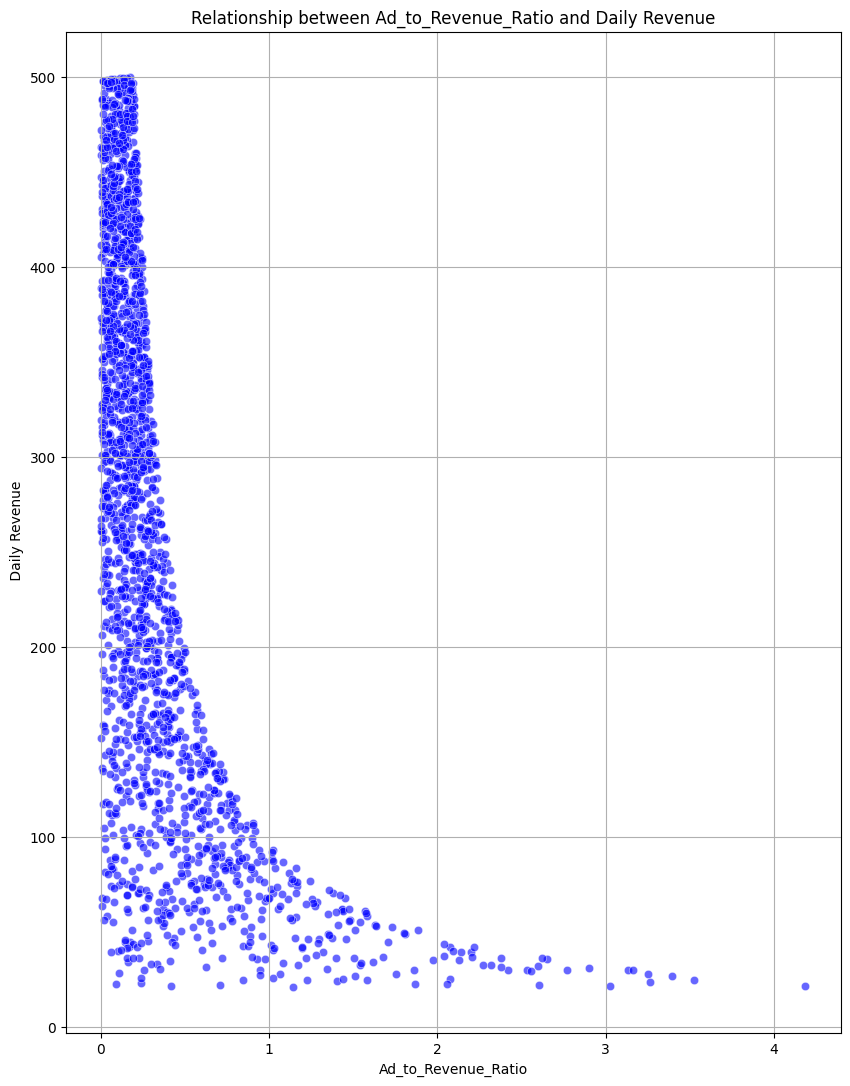

In [ ]:
plt.figure(figsize = (10 , 13))
sns.scatterplot(x = 'Ad_to_Revenue_Ratio' ,  y ="Daily Revenue" ,  data=data  , color='blue' ,  alpha= 0.6)
plt.title('Relationship between Ad_to_Revenue_Ratio and Daily Revenue')
plt.xlabel('Ad_to_Revenue_Ratio')
plt.ylabel(' Daily Revenue')
plt.grid(True)
plt.savefig('advertisement_spend_effect_daily_revenue_chart.png' , dpi = 300 )
plt.show()


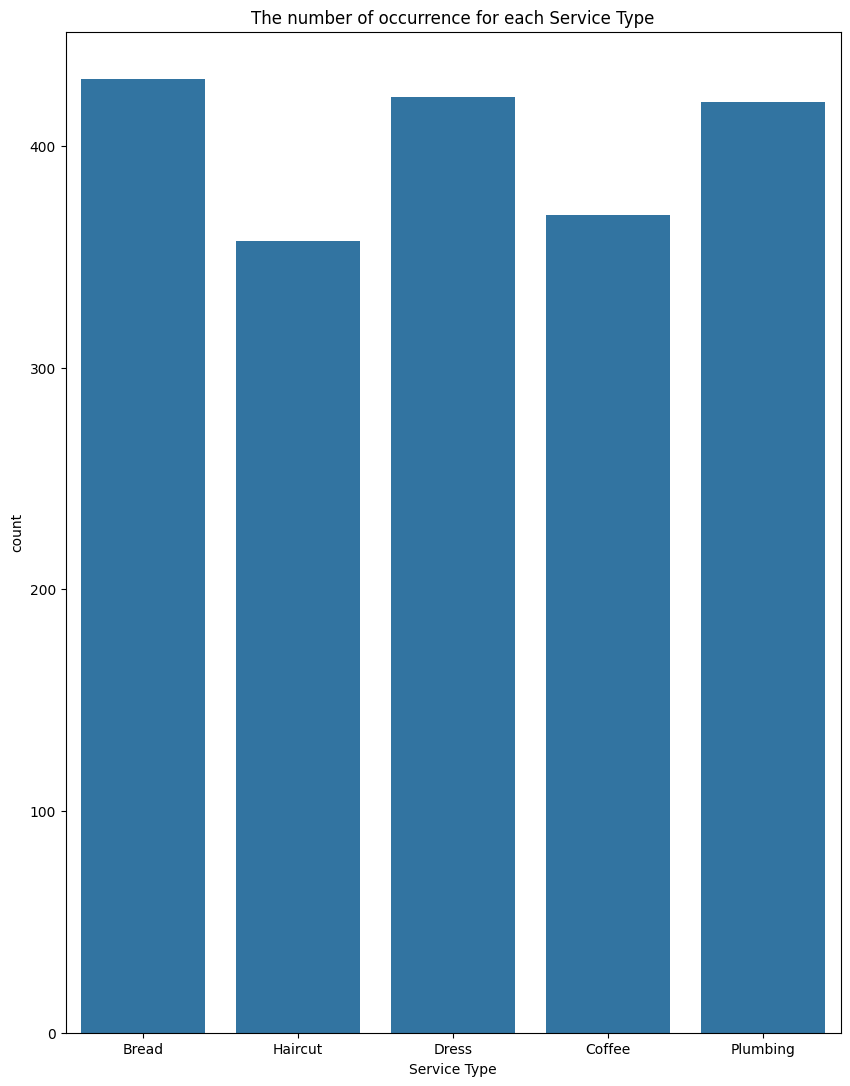

In [ ]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Service Type')
plt.title('The number of occurrence for each Service Type')
plt.xlabel('Service Type')
plt.savefig('service_type_chart.png' , dpi = 300 )
plt.show()


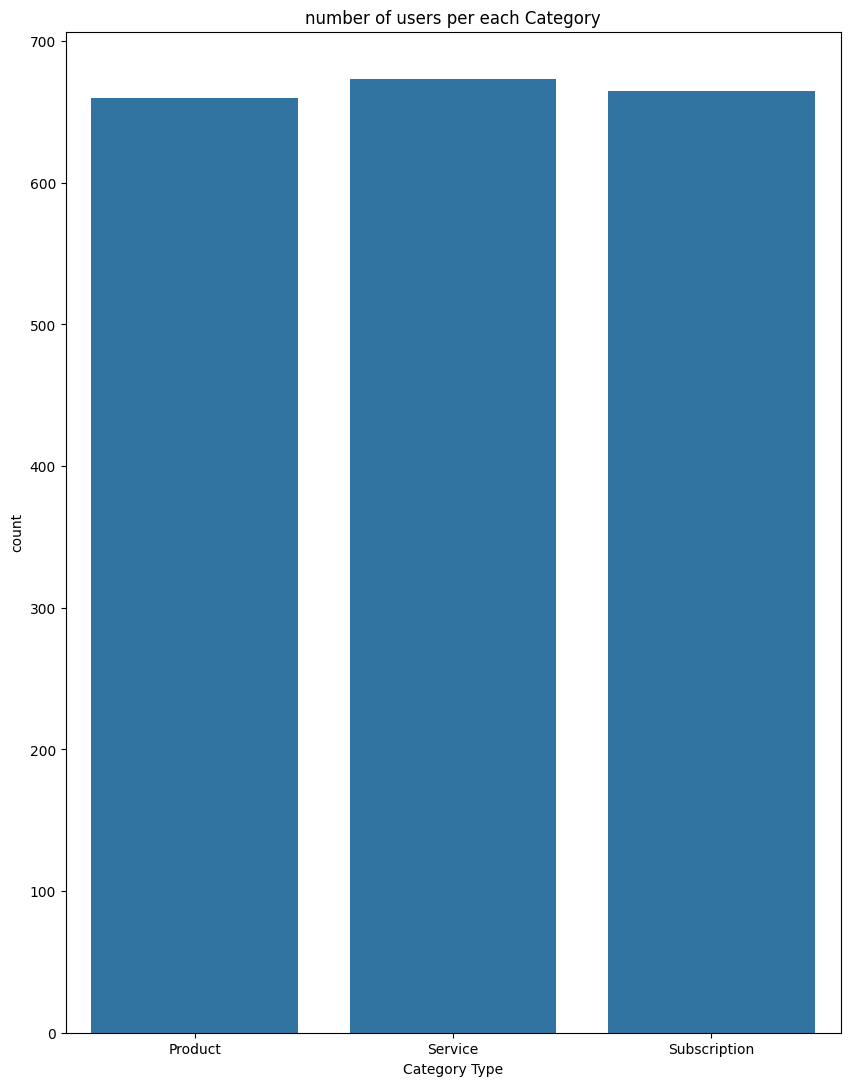

In [ ]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Category')
plt.title('number of users per each Category')
plt.xlabel('Category Type')
plt.savefig('Category_type_chart.png' , dpi = 300 )
plt.show()

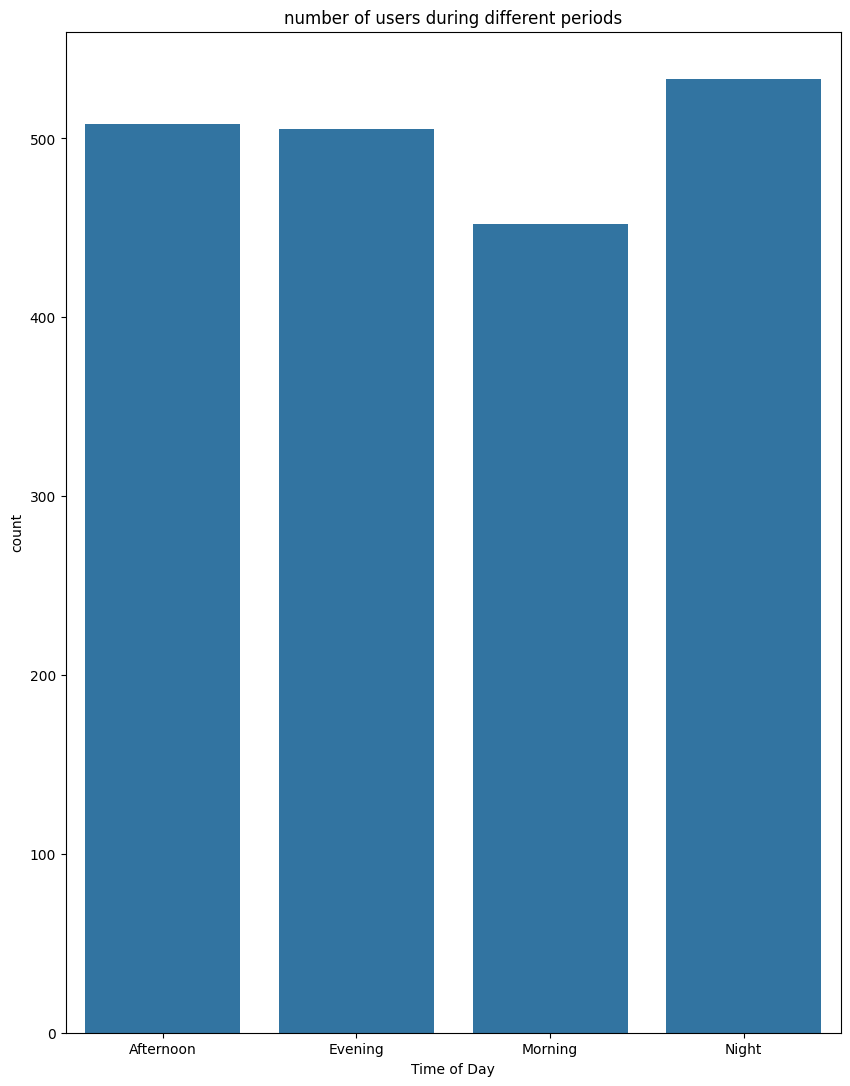

In [ ]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Time of Day')
plt.title('number of users during different periods')
plt.xlabel('Time of Day')
plt.savefig('time_of_day_chart.png' , dpi = 300 )
plt.show()

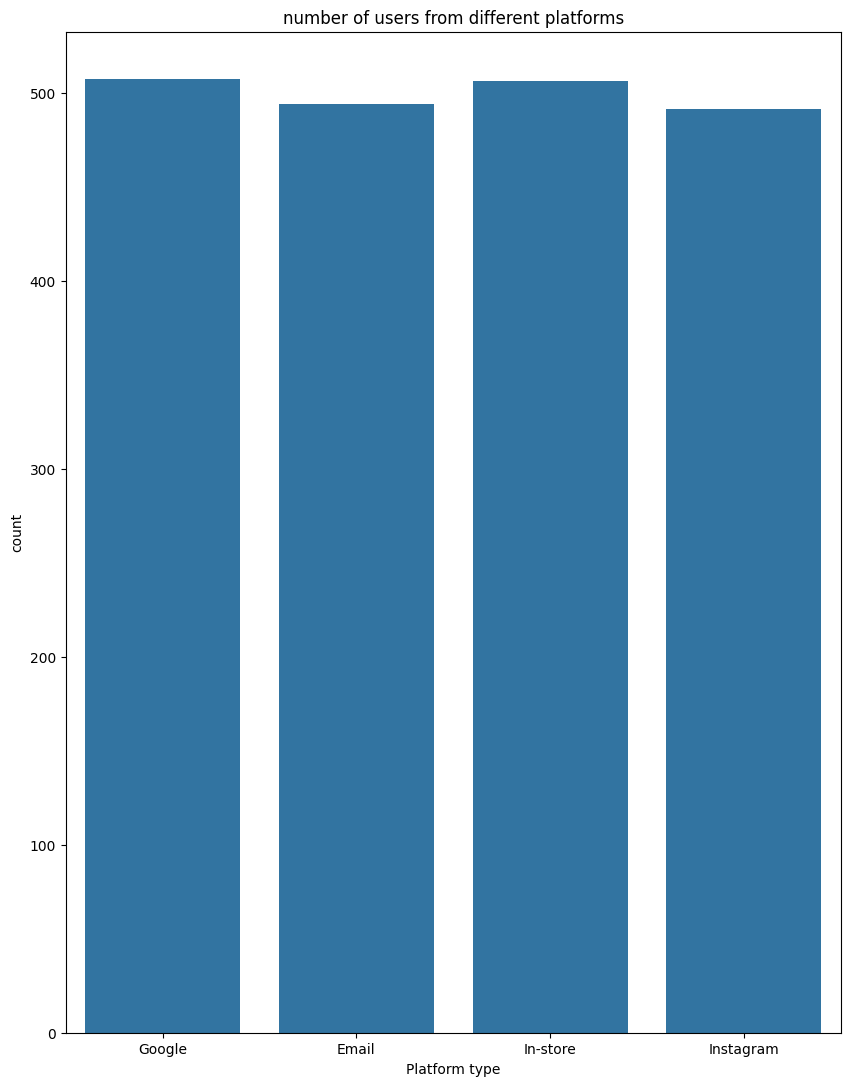

In [ ]:
plt.figure(figsize = (10 , 13))
sns.countplot(data = data , x = 'Platform')
plt.title('number of users from different platforms')
plt.xlabel('Platform type')
plt.savefig('platform_chart.png' , dpi = 300 )
plt.show()

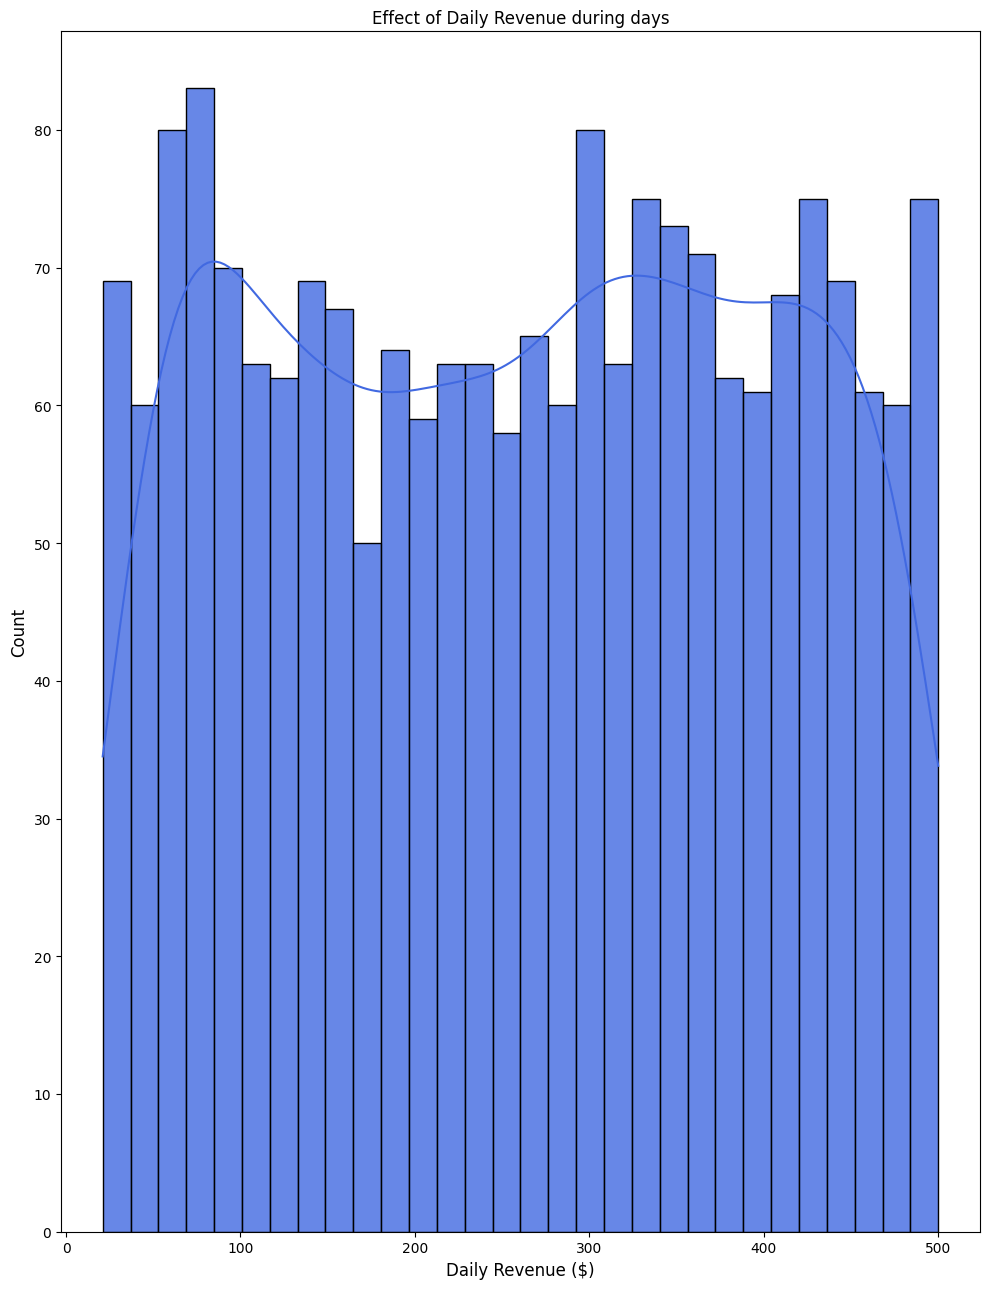

In [ ]:
plt.figure(figsize = (10 , 13))
sns.histplot(data = data, x='Daily Revenue',  bins=30, kde=True , color = 'royalblue' , alpha = 0.8)
plt.title('Effect of Daily Revenue during days')
plt.xlabel('Daily Revenue ($)'  , fontsize = 12)
plt.ylabel('Count'  , fontsize = 12)
plt.tight_layout()
plt.savefig('Comparison_Time_of_Day_ON Daily_Revenue.png' , dpi = 300 )

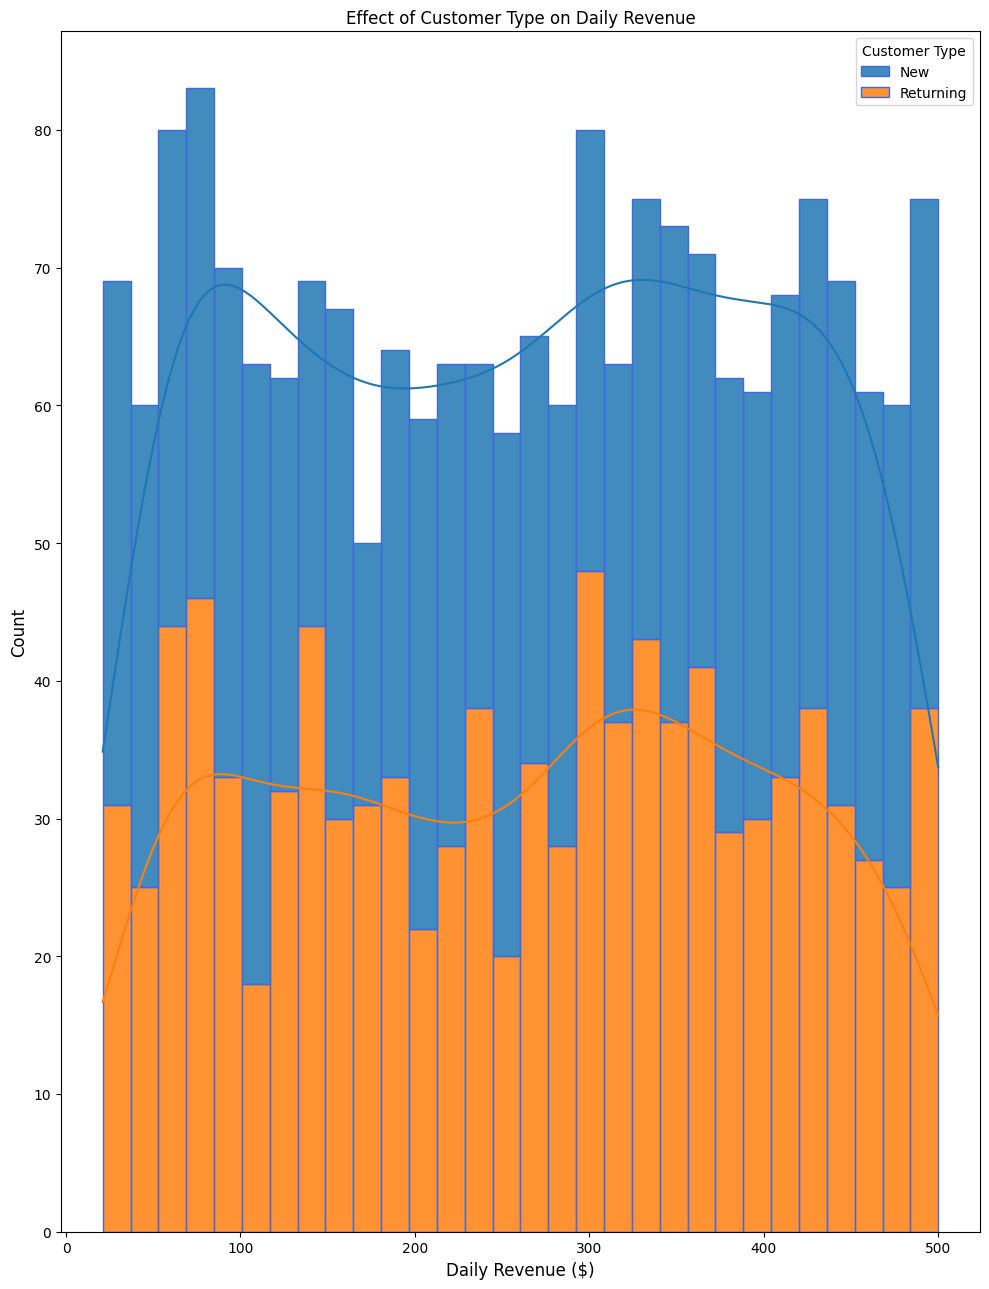

In [ ]:
# compaare Daily Revenue 
plt.figure(figsize = (10 , 13))
sns.histplot(data = data, x='Daily Revenue' , hue = 'Customer Type',  bins=30, kde=True  , multiple = 'stack', edgecolor = 'royalblue' , alpha = 0.85)
plt.title('Effect of Customer Type on Daily Revenue')
plt.xlabel('Daily Revenue ($)'  , fontsize = 12)
plt.ylabel('Count'  , fontsize = 12)
plt.tight_layout()
plt.savefig('Comparison_Time_of_Day_ON Daily_Revenue.png' , dpi = 300 )

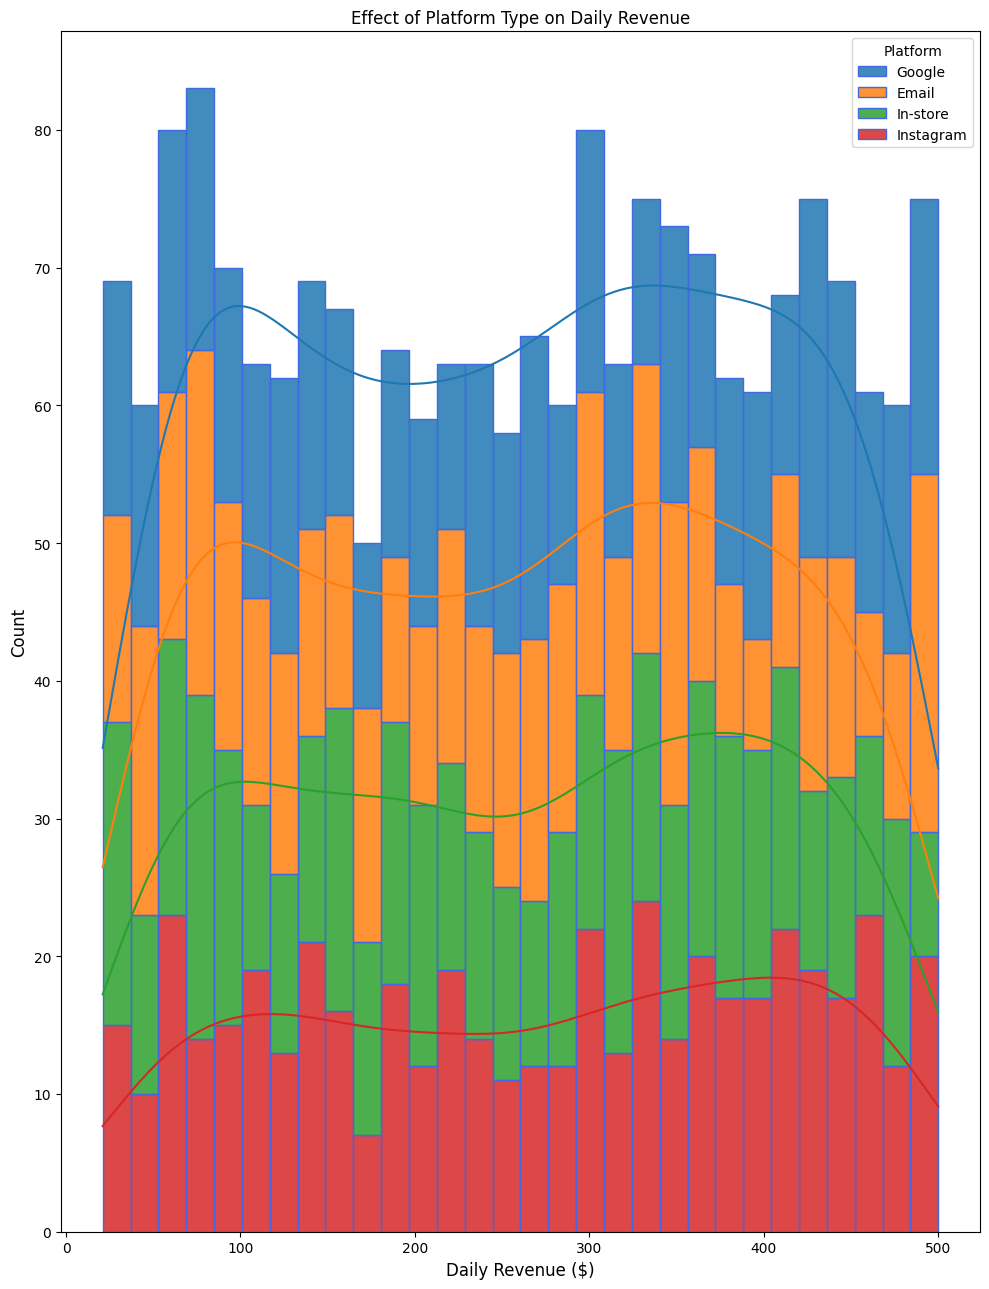

In [ ]:
# compaare Daily Revenue 
plt.figure(figsize = (10 , 13))
sns.histplot(data = data, x='Daily Revenue' , hue = 'Platform',  bins=30, kde=True  , multiple = 'stack', edgecolor = 'royalblue' , alpha = 0.85)
plt.title('Effect of Platform Type on Daily Revenue')
plt.xlabel('Daily Revenue ($)'  , fontsize = 12)
plt.ylabel('Count'  , fontsize = 12)
plt.tight_layout()
plt.savefig('Comparison_Time_of_Day_ON Daily_Revenue.png' , dpi = 300 )

In [ ]:
data['Service Type'] = data['Service Type'].fillna(data['Service Type'].mode())
print(data['Service Type'].isnull().sum())

0


In [ ]:
data.head()

,Time of Day,Category,Platform,Service Type,Customer Type,Ad Spend,Conversions,Daily Revenue,Last_treatment_Period_In_Years,Date_Of_Day,Month_Number,Year_Number,DayOfWeek_number,Revenue Change,Ad_to_Revenue_Ratio
1309,Afternoon,Product,Google,Bread,New,39.72,4,32.88,1.5,2,5,2024,3,-376.02,1.172373
1303,Evening,Service,Email,Haircut,New,18.11,0,465.06,1.5,2,5,2024,3,432.18,0.038858
267,Morning,Subscription,Email,Haircut,New,95.43,4,457.48,1.5,3,5,2024,4,-7.58,0.208144
1809,Night,Subscription,Email,Haircut,New,54.83,5,249.07,1.5,3,5,2024,4,-208.41,0.219259
660,Evening,Product,Email,Dress,Returning,19.98,5,225.13,1.5,3,5,2024,4,-23.94,0.088356


In [ ]:
cols = ['Time of Day' ,'Customer Type' , 'Platform' , 'Service Type' , 'Category' ]
for c in cols :
    print(f'{c} -> {data[c].unique()}')

Time of Day -> ['Afternoon' 'Evening' 'Morning' 'Night']
Customer Type -> ['New' 'Returning']
Platform -> ['Google' 'Email' 'In-store' 'Instagram']
Service Type -> ['Bread' 'Haircut' 'Dress' 'Coffee' 'Plumbing']
Category -> ['Product' 'Service' 'Subscription']


In [ ]:

data['Time of Day'] = data['Time of Day'].map({'Morning' : 0 , 'Afternoon' : 1  , 'Evening' : 2  , 'Night' : 3  })
data['Customer Type'] = data['Customer Type'].map({'New' : 0  , 'Returning' : 1})
data['Platform'] = data['Platform'].map({'Instagram' : 0 , 'In-store' : 1 , 'Email' : 2 , 'Google' : 3})
data ['Service Type']   = data ['Service Type'].map({'Coffee' : 0  , 'Dress' : 1 , 'Haircut' : 2 , 'Plumbing' : 3 })
data ['Category']  = data ['Category'].map({'Service' : 0  , 'Subscription' : 1})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 1309 to 1442
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time of Day                     1998 non-null   int64  
 1   Category                        1338 non-null   float64
 2   Platform                        1998 non-null   int64  
 3   Service Type                    1568 non-null   float64
 4   Customer Type                   1998 non-null   int64  
 5   Ad Spend                        1998 non-null   float64
 6   Conversions                     1998 non-null   int64  
 7   Daily Revenue                   1998 non-null   float64
 8   Last_treatment_Period_In_Years  1998 non-null   float64
 9   Date_Of_Day                     1998 non-null   int32  
 10  Month_Number                    1998 non-null   int32  
 11  Year_Number                     1998 non-null   int32  
 12  DayOfWeek_number                1998

In [ ]:
# looking for outlayers 
q1 = data['Time of Day'].quantile(0.25)
q3 = data['Time of Day'].quantile(0.75)
IQR = q3 - q1
low = q1 - 1.5 * IQR
high = q3 + 1.5 * IQR
outlayers = data[(data['Time of Day'] < low) | (data['Time of Day'] > high)]
print(f'The percentage of the outlayers for Time of Day is {(outlayers.shape[0] / data.shape[0])*100} %')

The percentage of the outlayers for Time of Day is 0.0 %


In [ ]:
data.describe()

,Time of Day,Category,Platform,Service Type,Customer Type,Ad Spend,Conversions,Daily Revenue,Last_treatment_Period_In_Years,Date_Of_Day,Month_Number,Year_Number,DayOfWeek_number,Revenue Change,Ad_to_Revenue_Ratio
count,1998.000000,1338.000000,1998.000000,1568.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.00000,1998.000000,1998.000000,1998.000000
mean,1.560060,0.497010,1.509009,1.528061,0.497497,50.556361,2.480981,260.443604,1.040731,15.486486,6.547548,2024.33033,3.045546,-0.278514,0.328377
std,1.110403,0.500178,1.117830,1.120889,0.500119,28.628659,1.722451,140.035884,0.290719,8.784493,3.433683,0.47045,2.013333,200.287935,0.429157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,21.020000,0.500000,1.000000,1.000000,2024.00000,0.000000,-460.790000,0.000218
25%,1.000000,0.000000,1.000000,1.000000,0.000000,26.110000,1.000000,134.692500,0.830000,8.000000,4.000000,2024.00000,1.000000,-140.925000,0.099864
50%,2.000000,0.000000,2.000000,1.000000,0.000000,50.760000,2.000000,264.560000,1.080000,15.000000,7.000000,2024.00000,3.000000,1.140000,0.195769
75%,3.000000,1.000000,3.000000,3.000000,1.000000,75.192500,4.000000,382.072500,1.330000,23.000000,10.000000,2025.00000,5.000000,143.087500,0.365006
max,3.000000,1.000000,3.000000,3.000000,1.000000,99.990000,5.000000,499.930000,1.500000,31.000000,12.000000,2025.00000,6.000000,457.730000,4.186244


In [ ]:
outs = {}
for column in data:
    # looking for outlayers 
    q1 = data[str(column)].quantile(0.25)
    q3 = data[str(column)].quantile(0.75)
    IQR = q3 - q1
    low = q1 - 1.5 * IQR
    high = q3 + 1.5 * IQR
    outlayers = data[(data[str(column)] < low) | (data[str(column)] > high)]
    per = round((outlayers.shape[0] / data.shape[0])*100, 2)
    if per > 21 :
        outs[str(column)] = per
        data[str(column)] = data[(data[str(column)] < low) & (data[str(column)] > high)][str(column)]

for item in outs :
    print(f'{item} -> {outs[item]}')

 ### outlayers is so small so we wil not delete ->as there is no null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 1309 to 1442
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time of Day                     1998 non-null   int64  
 1   Category                        1338 non-null   float64
 2   Platform                        1998 non-null   int64  
 3   Service Type                    1568 non-null   float64
 4   Customer Type                   1998 non-null   int64  
 5   Ad Spend                        1998 non-null   float64
 6   Conversions                     1998 non-null   int64  
 7   Daily Revenue                   1998 non-null   float64
 8   Last_treatment_Period_In_Years  1998 non-null   float64
 9   Date_Of_Day                     1998 non-null   int32  
 10  Month_Number                    1998 non-null   int32  
 11  Year_Number                     1998 non-null   int32  
 12  DayOfWeek_number                1998

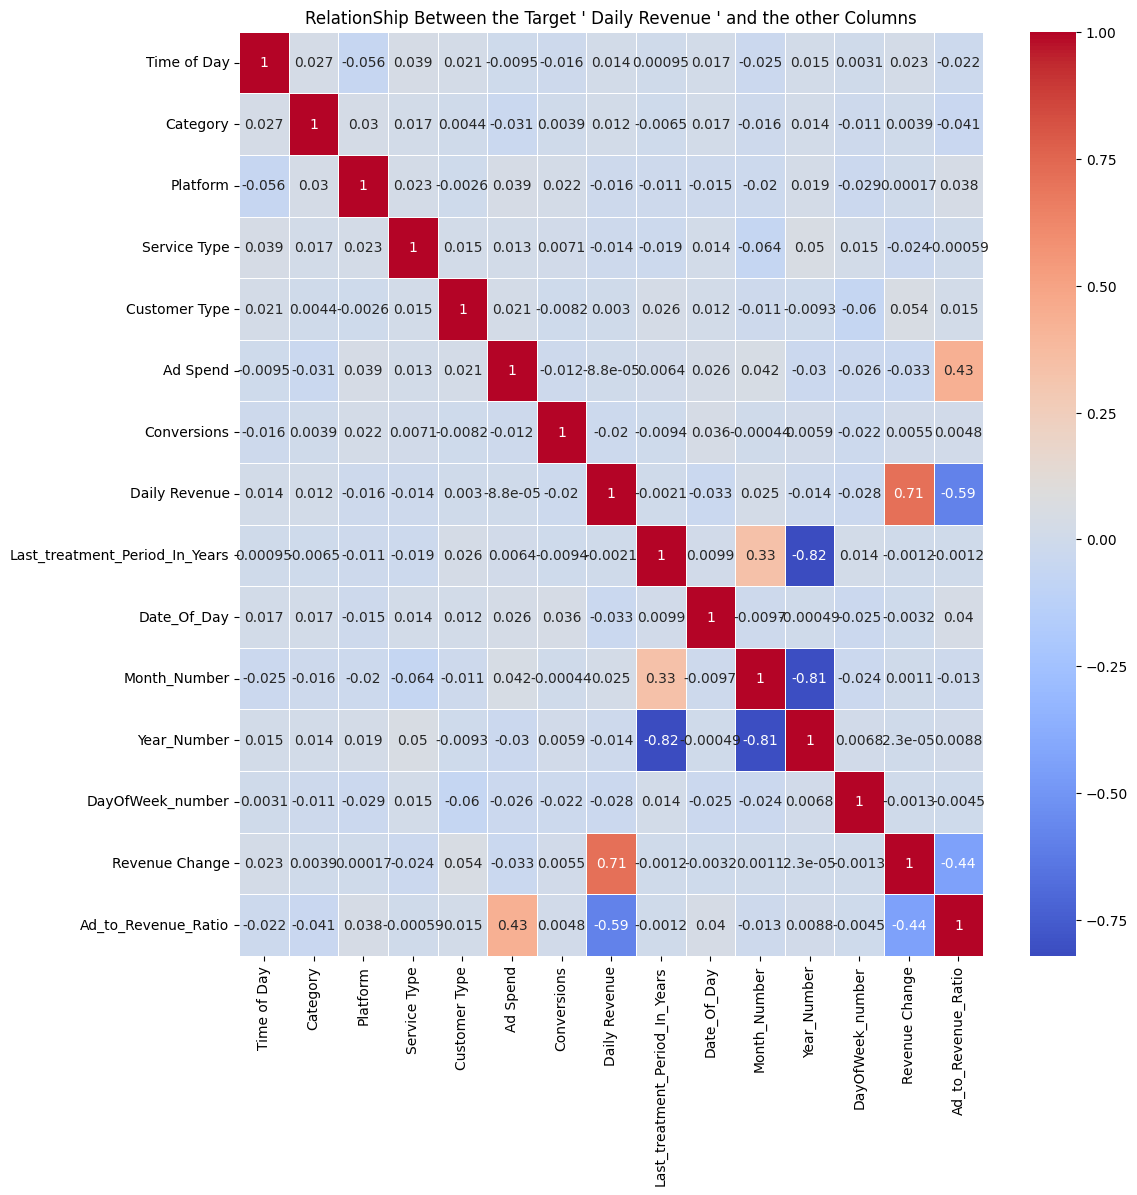

In [ ]:
# seee the realtionship between the target 'Daily Revenue' and all columns
plt.figure(figsize = (12 , 12))
sns.heatmap(data = data.corr() , annot = True , cmap = 'coolwarm'  , linewidth = 0.5 )
plt.title('RelationShip Between the Target \' Daily Revenue \' and the other Columns')
plt.savefig('Correlation_Between_The target_and_the_other_columns.png' , dpi = 300)
plt.show()

In [ ]:
data.describe()

,Time of Day,Category,Platform,Service Type,Customer Type,Ad Spend,Conversions,Daily Revenue,Last_treatment_Period_In_Years,Date_Of_Day,Month_Number,Year_Number,DayOfWeek_number,Revenue Change,Ad_to_Revenue_Ratio
count,1998.000000,1338.000000,1998.000000,1568.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.00000,1998.000000,1998.000000,1998.000000
mean,1.560060,0.497010,1.509009,1.528061,0.497497,50.556361,2.480981,260.443604,1.040731,15.486486,6.547548,2024.33033,3.045546,-0.278514,0.328377
std,1.110403,0.500178,1.117830,1.120889,0.500119,28.628659,1.722451,140.035884,0.290719,8.784493,3.433683,0.47045,2.013333,200.287935,0.429157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,21.020000,0.500000,1.000000,1.000000,2024.00000,0.000000,-460.790000,0.000218
25%,1.000000,0.000000,1.000000,1.000000,0.000000,26.110000,1.000000,134.692500,0.830000,8.000000,4.000000,2024.00000,1.000000,-140.925000,0.099864
50%,2.000000,0.000000,2.000000,1.000000,0.000000,50.760000,2.000000,264.560000,1.080000,15.000000,7.000000,2024.00000,3.000000,1.140000,0.195769
75%,3.000000,1.000000,3.000000,3.000000,1.000000,75.192500,4.000000,382.072500,1.330000,23.000000,10.000000,2025.00000,5.000000,143.087500,0.365006
max,3.000000,1.000000,3.000000,3.000000,1.000000,99.990000,5.000000,499.930000,1.500000,31.000000,12.000000,2025.00000,6.000000,457.730000,4.186244


In [ ]:
data.dropna(inplace=True)

In [ ]:
x  = data.drop(columns = ['Daily Revenue'])
y = data['Daily Revenue']
poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)
x_train , x_test  , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42 )
scaler = StandardScaler()  

x_train = scaler.fit_transform(x_train)
x_test  = scaler.fit_transform(x_test)


### Here We will use some search for Best Accuracy for Test AND Train

In [ ]:
                          
# model.fit(x_train , y_train)

model =XGBRegressor(n_estimator =300, learning_rate =  0.05 , max_depth =  6 )
model.fit(x_train , y_train)
y_train_predict = model.predict(x_train)
y_test_predict  = model.predict(x_test)

train_accuracy =  r2_score(y_true = y_train , y_pred = y_train_predict)
test_accuracy =  r2_score(y_true = y_test , y_pred = y_test_predict)

print(f'r2-Score for Training Model is {train_accuracy}')
print(f'r2-Score for Testing Model is {test_accuracy}')

c:\Users\lap\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:14:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


r2-Score for Training Model is 0.9959918306595947
r2-Score for Testing Model is 0.9324694697685262


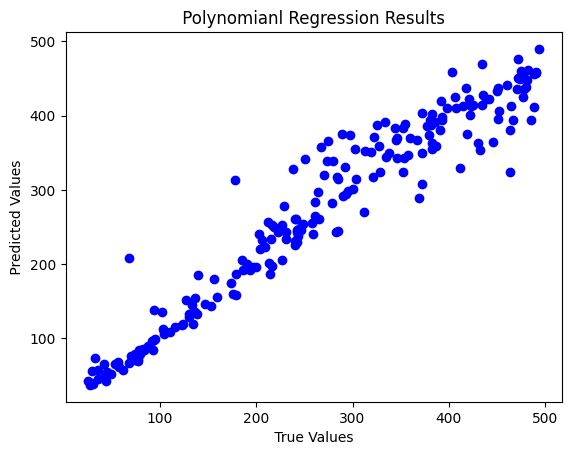

In [ ]:
plt.scatter(y_test ,  y_test_predict  , color = 'blue'  )
plt.xlabel(' True Values ')
plt.ylabel(' Predicted Values ')
plt.title(' Polynomianl Regression Results ')
plt.show()

In [ ]:
model.save_model("model_project.json")
print('Model saved sucessfully ....')

Model saved sucessfully ....


In [ ]:
import joblib 
joblib.dump(scaler , 'scaler_project.pkl')
print('scaler saved sucessfully ....')